In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from datetime import datetime

In [0]:
from __future__ import division

In [0]:
import pandas_datareader.data as web


In [0]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [0]:
end=datetime.now()
#for data grab
#year ago of todays date
start=datetime(end.year-1,end.month,end.day)

In [0]:
for stock in tech_list:
  globals()[stock]= web.DataReader(stock,'yahoo',start,end)
  #taking stock ticker and making into global variable 
  #taking the string and setting it as the dataframe name 

In [8]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-13,1094.170044,1080.150024,1083.640015,1088.770020,1057700,1088.770020
2019-06-14,1092.689941,1080.171997,1086.420044,1085.349976,1111500,1085.349976
2019-06-17,1099.180054,1086.280029,1086.280029,1092.500000,941600,1092.500000
2019-06-18,1116.390015,1098.989990,1109.689941,1103.599976,1386700,1103.599976
2019-06-19,1107.000000,1093.479980,1105.599976,1102.329956,1338800,1102.329956


In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,262.414782,256.476048,259.070514,259.710711,3.377174e+07,258.340462
std,43.975718,42.708848,43.181809,43.573166,1.722824e+07,44.089534
min,193.589996,190.300003,191.550003,192.740005,1.136200e+07,190.466873
25%,220.789993,215.130005,218.070007,217.729996,2.189010e+07,215.979630
50%,264.010010,259.000000,261.130005,262.010010,2.860650e+07,260.683990
75%,301.000000,292.750000,296.440002,298.179993,3.973230e+07,296.879883
max,354.769989,346.089996,349.309998,352.839996,1.067212e+08,352.839996


In [10]:
AAPL.info()
#adj close takes into account the changes in the stock 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-13 to 2020-06-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


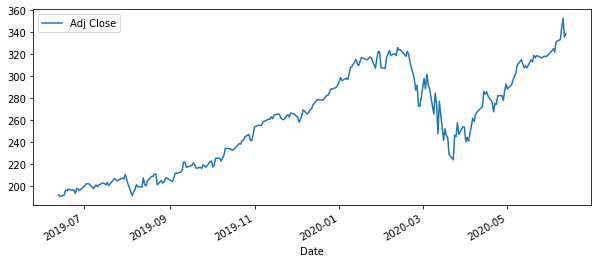

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

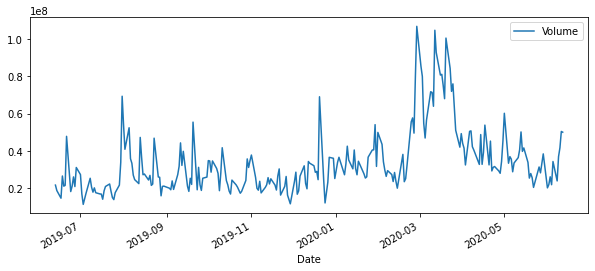

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [0]:
#now plotting the moving averages

In [0]:
#making a 10,20,50 day moving average 
ma_day=[10,20,50]

for ma in ma_day:
  column_name="Moving Average for %s days" %(str(ma))


  #AAPL[column_name]=AAPL.rolling(1, on='Adj Close').mean()

#  AAPL[column_name]=pd.rolling(AAPL['Adj Close'],ma)


In [0]:
#AAPL[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(subplots=False,figsize(10,4))

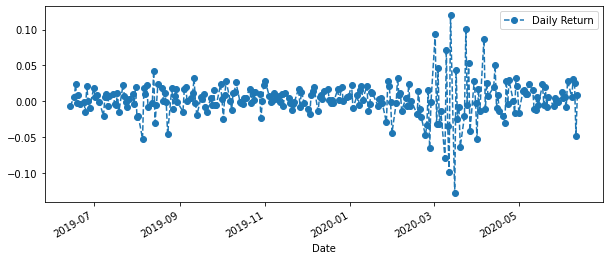

In [16]:
#daily returns and risk of the stock

#on any given day what was your percent return on that day

AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

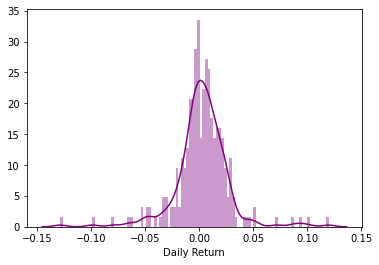

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

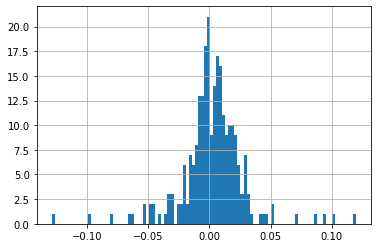

In [18]:
#same thing using hist()
AAPL['Daily Return'].hist(bins=100)

In [0]:
closing_df=web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
closing_df.head()# bunch of adj closing prices

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-13,191.860229,1088.770020,130.711548,1870.300049
2019-06-14,190.466873,1085.349976,130.839981,1869.670044
2019-06-17,191.603317,1092.500000,131.235123,1886.030029
2019-06-18,196.109528,1103.599976,133.517029,1901.369995
2019-06-19,195.536377,1102.329956,134.040604,1908.790039


In [0]:
tech_rets=closing_df.pct_change()

In [22]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-13,NaN,NaN,NaN,NaN
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337
2019-06-17,0.005967,0.006588,0.003020,0.008750
2019-06-18,0.023518,0.010160,0.017388,0.008133
2019-06-19,-0.002923,-0.001151,0.003921,0.003902


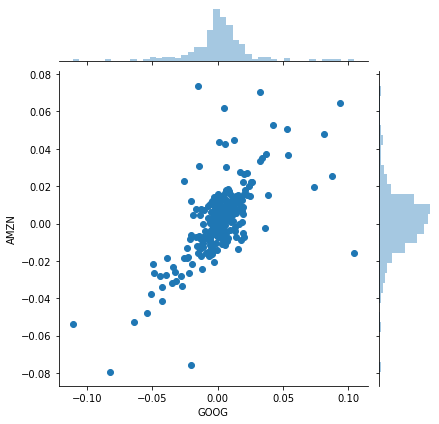

In [23]:
# pearson product-moment correlation coefficient tells us how related Daily Percentage Returns are
sns.jointplot('GOOG','AMZN',tech_rets,kind='scatter')

In [24]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-13,NaN,NaN,NaN,NaN
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337
2019-06-17,0.005967,0.006588,0.003020,0.008750
2019-06-18,0.023518,0.010160,0.017388,0.008133
2019-06-19,-0.002923,-0.001151,0.003921,0.003902


In [26]:
tech_rets.dropna()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337
2019-06-17,0.005967,0.006588,0.003020,0.008750
2019-06-18,0.023518,0.010160,0.017388,0.008133
2019-06-19,-0.002923,-0.001151,0.003921,0.003902
2019-06-20,0.008036,0.008246,0.009286,0.004925
...,...,...,...,...
2020-06-08,0.005912,0.005715,0.006197,0.016536
2020-06-09,0.031578,0.006602,0.007645,0.030427
2020-06-10,0.025728,0.006654,0.037092,0.017913


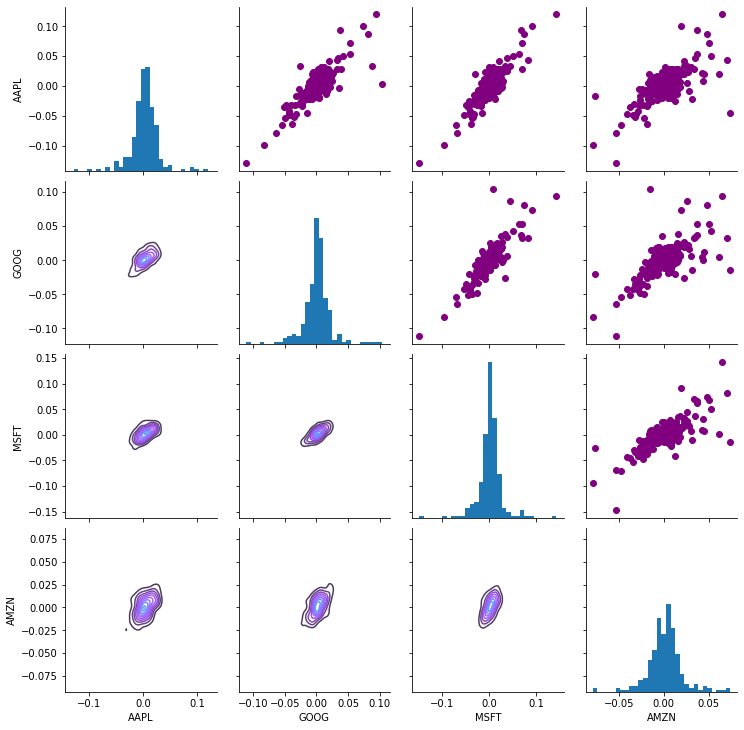

In [28]:
returns_fig=sns.PairGrid(tech_rets.dropna())

#deciding what we want to display on the upper triangle
returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')#cool darker

returns_fig.map_diag(plt.hist,bins=30)

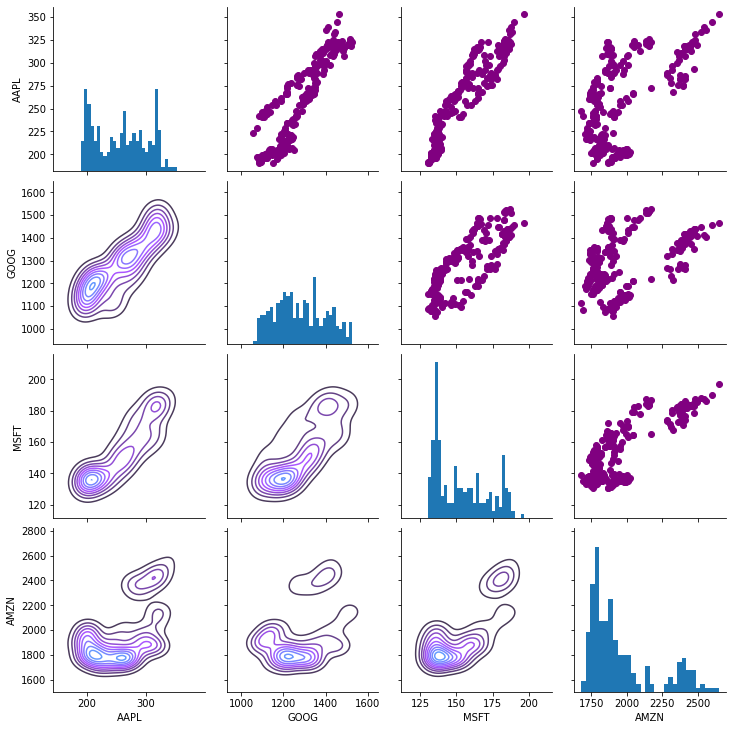

In [29]:
returns_fig=sns.PairGrid(closing_df)

#deciding what we want to display on the upper triangle
returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')#cool darker

returns_fig.map_diag(plt.hist,bins=30)

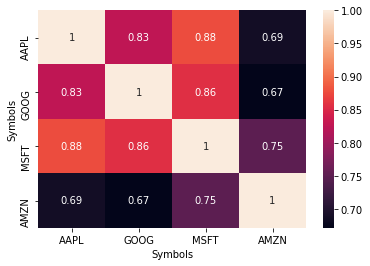

In [38]:
#Correlation plot for daily returns and also check in scatter plot above
trc=tech_rets.dropna().corr()
sns.heatmap(trc,annot=True)

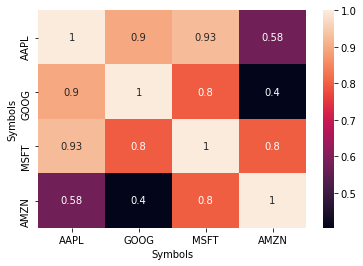

In [40]:
#Correlation in closing prices , all tech prices are positively correlated
sns.heatmap(closing_df.corr(),annot=True)

In [0]:
#Stock and its Risk(Standard Deviation of Daily Returns)
#Quantifying risks

In [0]:
#Comparing Expected Returns with Standard Deviation of Daily Returns i.e Risk vs Expected Returns

In [0]:
rets=tech_rets.dropna()

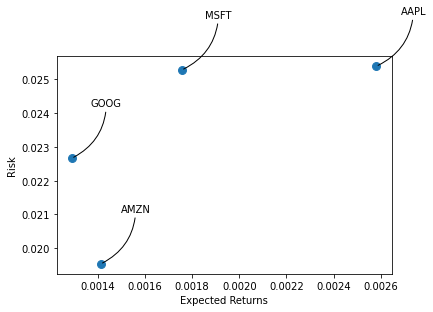

In [46]:
area=np.pi*20#find area for circles of scatter plot

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

#Annotating scatter plot with labels 
#http://matplotlib.org/users/annotations_guide.html

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
  plt.annotate(
      label,
      xy = (x,y), xytext=(50,50),
      textcoords='offset points', ha='right', va='bottom',
      arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3') 
  )

In [0]:
#Value at Risk 
#amount of money we could expect to loose for a given confidence interval

In [0]:
#Boothstrap method: we calculate the empirical quantiles from histogram of daily returns

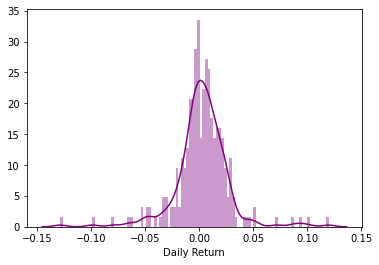

In [50]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [51]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337
2019-06-17,0.005967,0.006588,0.003020,0.008750
2019-06-18,0.023518,0.010160,0.017388,0.008133
2019-06-19,-0.002923,-0.001151,0.003921,0.003902
2019-06-20,0.008036,0.008246,0.009286,0.004925


In [52]:
rets['AAPL'].quantile(0.05)

-0.03425838271082968

In [0]:
#the 0.05 empirical quantile of daily returns is at -0.034, that means that with 95% confidence ,our worst daily loss will not exceed 3.4%,
#if we have 1 million dollar investment, our one-day 5% VaR is 0.034*1,000,000=$34,000